In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint 

In [2]:
df = pd.read_csv('./dataset/[UCI]bank/bank-full.csv', sep=';')
print(df.head())

df_x = df.copy()
del df_x['y']

df_y = df[['y']].copy().astype('category')
# label encode y - yes->1 no->0
df_y = df_y.apply(lambda x: x.cat.codes)
print(df_y.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
   y
0  0
1  0
2  0
3  0
4  0


In [3]:
print(df_x.shape)
print(df_x.columns)
print(df_x.info())
df_x.dtypes.value_counts()

(45211, 16)
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB
None


object    9
int64     7
dtype: int64

The data-set has 45211 records with 16 attributes.

All the data columns has 4521 entries implying that there are no null entries.

In [4]:
for col in df_x.select_dtypes(include=['object']):
    # Changing the dtype of categorical columns to 'category' reduces memory usage
    df_x[col] = df_x[col].astype('category')
    
df_cat = df_x.select_dtypes(include=['category']).copy()
df_x.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Columns: 16 entries, age to poutcome
dtypes: category(9), int64(7)
memory usage: 2.8 MB


Memory usage decreased from 5.5+MB to 1.3MB

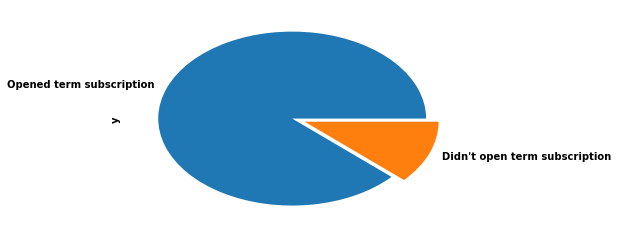

In [5]:
labels = ["Opened term subscription", "Didn't open term subscription"]
df_y['y'].value_counts().plot.pie(labels=labels, explode=[0, 0.1]);

We can see that most of the labels are for not opening a term subscription

### Categorical data

In [6]:
# create a label encoded version of categorical attributes for analysis
df_cat_lab = df_cat.copy()
df_cat_lab = df_cat_lab.apply(lambda x: x.cat.codes)

print(df_cat_lab.head(), '\n')

print("Job categories")
for x, y in zip(df_cat['job'].cat.categories, [l for l in range( 1, len(df_cat['job'].cat.categories) + 1)] ):
    print(y, x)


   job  marital  education  default  housing  loan  contact  month  poutcome
0    4        1          2        0        1     0        2      8         3
1    9        2          1        0        1     0        2      8         3
2    2        1          1        0        1     1        2      8         3
3    1        1          3        0        1     0        2      8         3
4   11        2          3        0        0     0        2      8         3 

Job categories
1 admin.
2 blue-collar
3 entrepreneur
4 housemaid
5 management
6 retired
7 self-employed
8 services
9 student
10 technician
11 unemployed
12 unknown


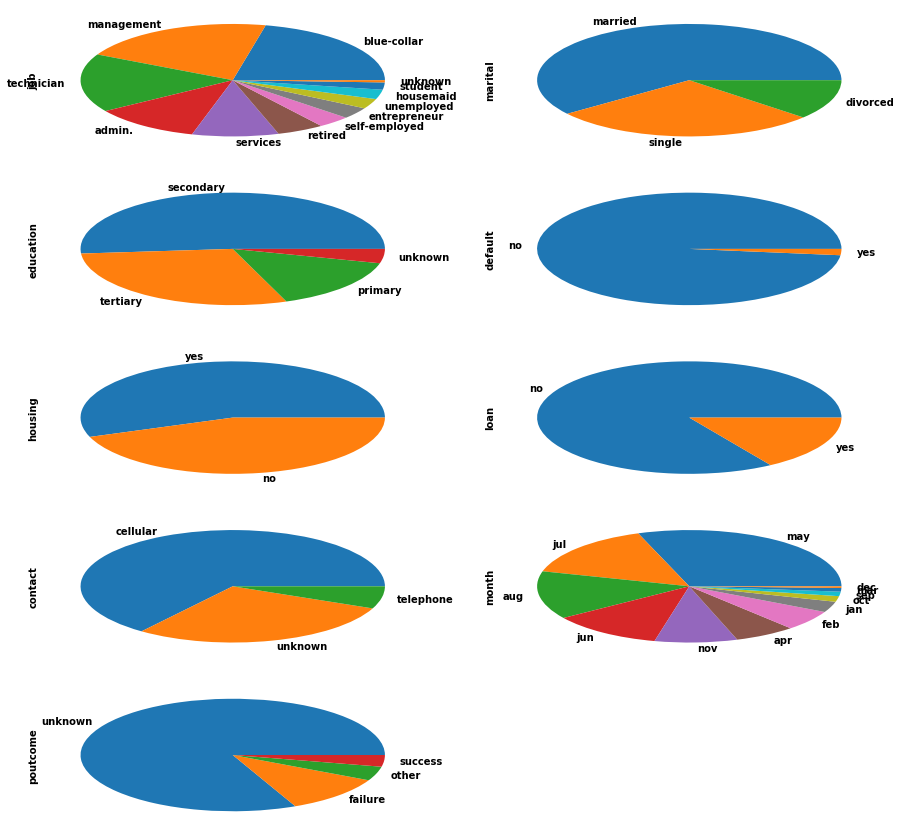

In [7]:
plt.figure(figsize=(15, 15))

for index, col in enumerate(df_cat.columns):
    plt.subplot(5, 2, index+1)
    df[col].value_counts().plot.pie()

We can remove the **default** attribute as it is highly skewed and **duration** too as it is highly corerlated to the outcome as suggested in the dataset description.

### Numerical data distribution

In [8]:
print(df_x.describe())

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

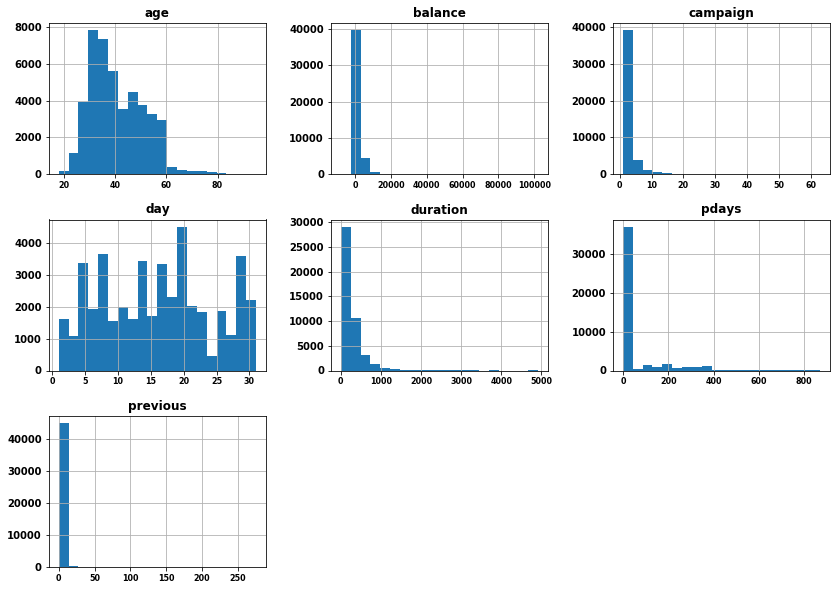

In [9]:
df_num = df_x.select_dtypes(include=['int64']).copy()

df_num.hist(figsize=(14, 10), bins=20, xlabelsize=8);

Numerical columns except **age** and **day** are positively skewed

### Correlation

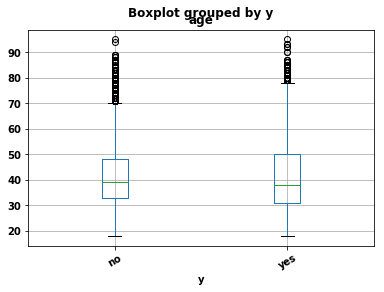

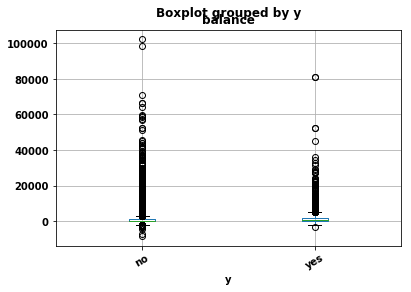

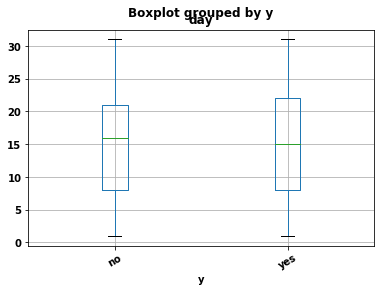

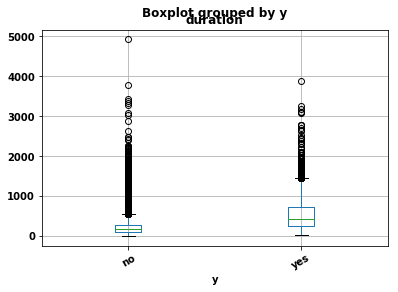

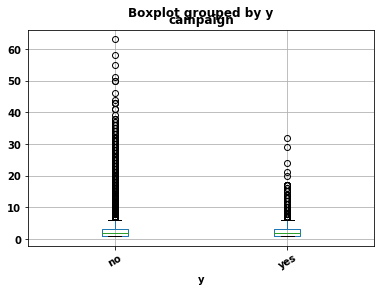

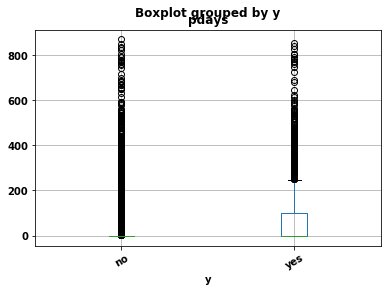

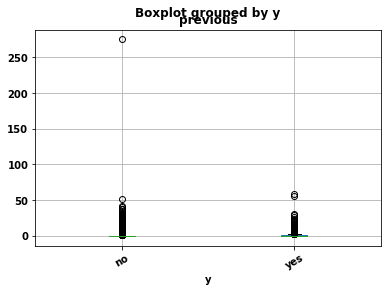

In [10]:
for index, col in enumerate(df_num.columns):
    df.boxplot(col,'y',rot = 30)


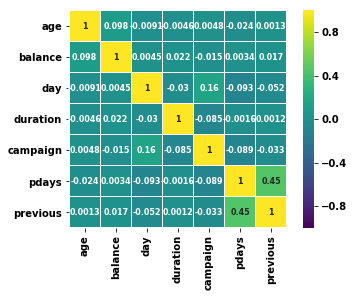

In [11]:
corr = df_num.corr()

sns.heatmap(corr, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

**previous** and **pdays** columns are slightly correlated

### Encoding

#### Models like logistic regression and svm are algebraic. Therefore we must convert the categorical variables to numeric.

In [12]:
df_x_onehot = df_x.copy()
df_x_onehot = pd.get_dummies(df_x_onehot, columns=df_cat.columns, prefix = df_cat.columns)

print(df_x_onehot.head(2))

   age  balance  day  duration  campaign  pdays  previous  job_admin.  \
0   58     2143    5       261         1     -1         0           0   
1   44       29    5       151         1     -1         0           0   

   job_blue-collar  job_entrepreneur        ...         month_jun  month_mar  \
0                0                 0        ...                 0          0   
1                0                 0        ...                 0          0   

   month_may  month_nov  month_oct  month_sep  poutcome_failure  \
0          1          0          0          0                 0   
1          1          0          0          0                 0   

   poutcome_other  poutcome_success  poutcome_unknown  
0               0                 0                 1  
1               0                 0                 1  

[2 rows x 51 columns]


## Analysis by attribute

In [13]:
print(df_x.columns)
print(df_x.info(verbose=False))


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Columns: 16 entries, age to poutcome
dtypes: category(9), int64(7)
memory usage: 2.8 MB
None


Of the 16 attributes 9 are categorical and 7 are numerical. Again **age, job, marital, education, balance, housing, loan, and contact** are personal attributes while others are related to the campaign of which *age* and *balance* are the only *numerical* attributes

### Age

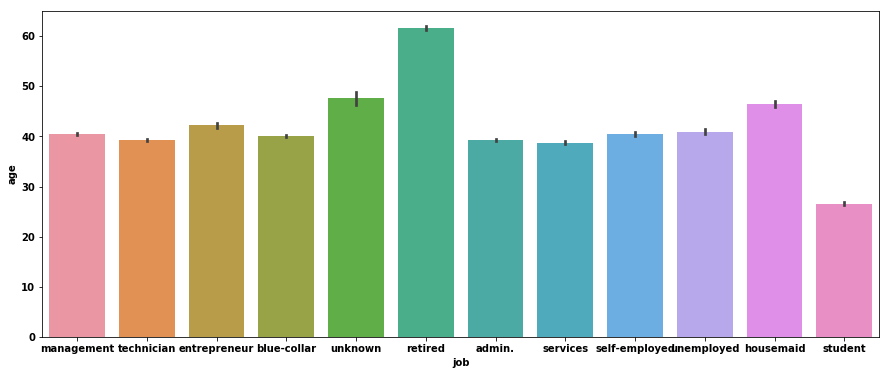

In [14]:
plt.figure(figsize=(15, 6))
'''
for index, col in enumerate(df_cat.columns):
    plt.subplot(5, 2, index+1)
    #plt.subplots_adjust(hspace=1)
    sns.barplot(x=col, y='age', hue='y', data=df)#, estimator=lambda x: len(x) / len(df) * 100)
    #if(index==3): break
'''
sns.barplot(x='job', y='age', data=df)

Retired people are having higher median age

### Job

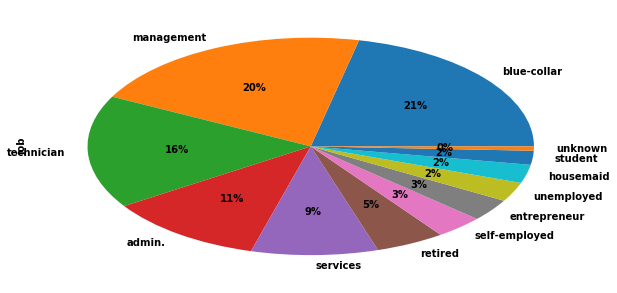

In [15]:
df_x['job'].value_counts().plot.pie(autopct='%d%%', figsize=(10,5));

Blue collar and management jobs are the occupations that are majority

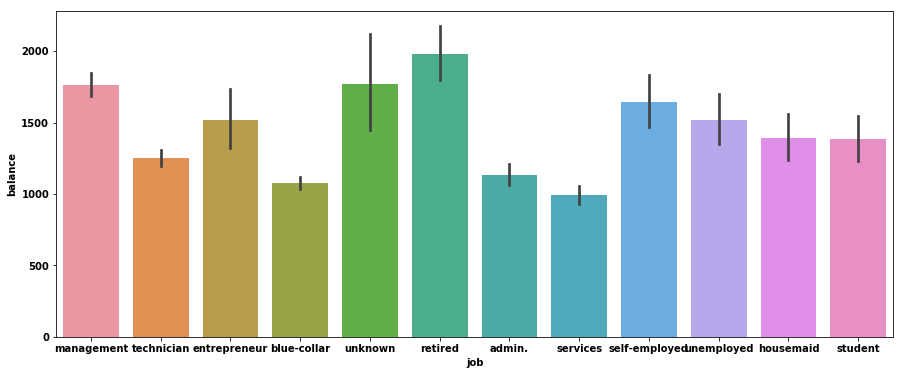

In [16]:
plt.figure(figsize=(15, 6))

sns.barplot(y='balance', x='job',data=df);

Retired and management people are having higher median balance

### Marital

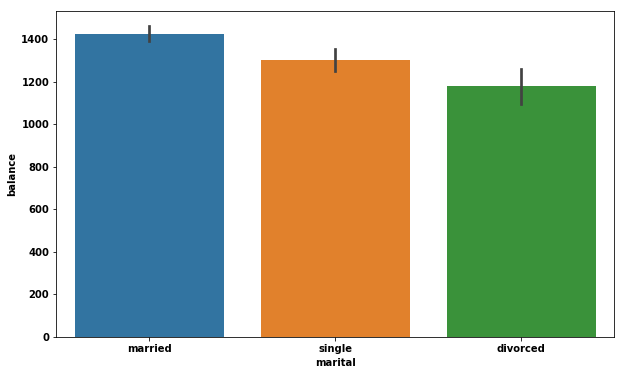

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='marital', y='balance', data=df);

Divorced persons are having lesser median balance. 

### Education

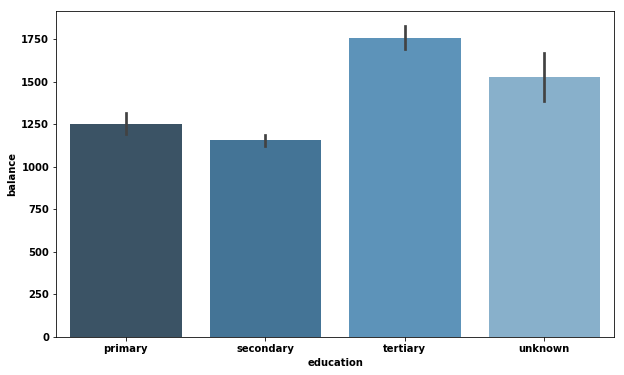

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='education', y='balance', data=df, order=['primary', 'secondary', 'tertiary', 'unknown'], palette="Blues_d");

Balance is also affected by *education*

### Housing 

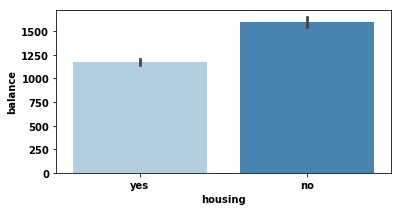

In [19]:
plt.figure(figsize=(6, 3))
sns.barplot(x='housing', y='balance', data=df, palette="Blues");

People who has no housing loan has higher median balance

### Loan

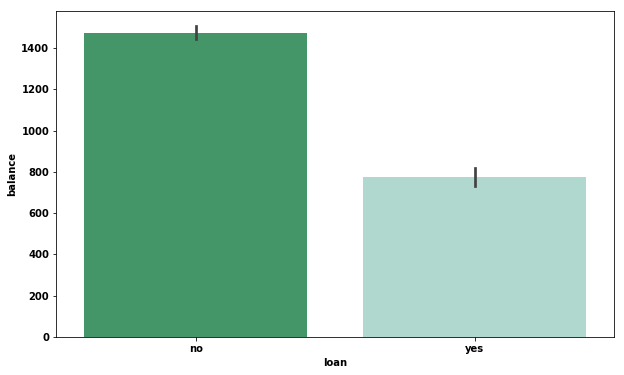

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='loan', y='balance', data=df, palette="BuGn_r")

Whether or not having a previous personal loan has impact on the balance

### Balance

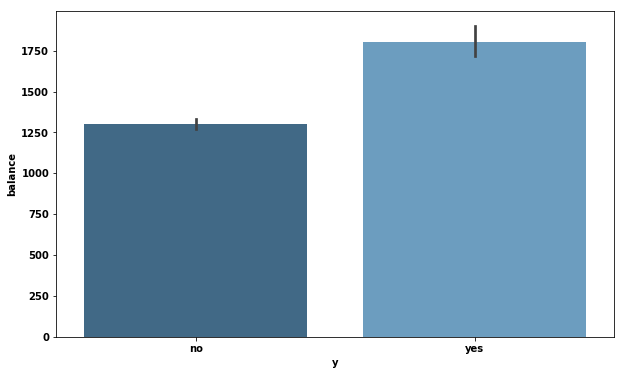

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='y', y='balance', data=df, palette="Blues_d");

People having more balance are more likely to take a term deposit subscription

### Classification

** With categorical attributes one hot encoded**

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x_onehot, df_y['y'], test_size=0.33, random_state=42)

print(X_train.shape, X_test.shape)

(30291, 51) (14920, 51)


In [23]:
clf_log = LogisticRegression(random_state=42)

clf_log.fit(X_train, y_train)

score = clf_log.score(X_test, y_test)
print(score)
#print("Accuracy {}".format(np.mean(y_pred == y_test)))

0.9005361930294906


In [24]:
from sklearn.svm import LinearSVC

clf_svm = LinearSVC(random_state=42)
clf_svm.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

In [25]:
score = clf_svm.score(X_test, y_test)
print(score)

0.8815683646112601


** find cross-validation score to avoid overfitting **

In [26]:
from sklearn.model_selection import cross_val_score

cross_log_clf = LogisticRegression(random_state=42)
cross_svm_clf = LinearSVC(random_state=42)

cross_log_score = cross_val_score(cross_log_clf, X_train, y_train, cv=3)
print("Logistic classifier cross validation score: {}".format(np.mean(cross_log_score)))

cross_svm_score = cross_val_score(cross_svm_clf, X_train, y_train, cv=3)
print("Linear svm cross validation score: {}".format(np.mean(cross_svm_score)))

Logistic classifier cross validation score: 0.9018851327318772
Linear svm cross validation score: 0.8869619923089661


** With categorical attributes label encoded**

In [27]:
# Use label encoding on categorical variables instead of one hot encoding
df_x_catcode = df_x.copy()
df_x_catcode[df_cat_lab.columns] = df_cat_lab
print(df_x_catcode.head())

   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  
0    5      8       261         1     -1         0         3  
1    5      8       151         1     -1         0         3  
2    5      8        76         1     -1         0         3  
3    5      8        92         1     -1         0         3  
4    5      8       198         1     -1         0         3  


In [28]:
X1_train, X1_test, y1_train, y1_test = train_test_split(df_x_catcode, df_y['y'], test_size=0.33, random_state=42)

print(X1_train.shape, X1_test.shape)

clf_log_cat = LogisticRegression(random_state=42)
clf_log_cat.fit(X1_train, y1_train)

y_pred_log_cat = clf_log_cat.predict(X1_test)

clf_log_cat_score = clf_log_cat.score(X1_test, y1_test)
print("Logistic classifier score on labeled categories: {}".format(clf_log_cat_score))

clf_svm_cat = LinearSVC(random_state=42)
clf_svm_cat.fit(X1_train, y1_train)

y_pred_svm_cat = clf_svm_cat.predict(X1_test)

clf_svm_cat_score = clf_svm_cat.score(X1_test, y1_test)
print("Linear svm score on labeled categories: {}".format(clf_svm_cat_score))

# cross validated models
cross_log_clf_cat = LogisticRegression(random_state=42)
cross_svm_clf_cat = LinearSVC(random_state=42)

cross_log_score = cross_val_score(cross_log_clf_cat, X1_train, y1_train, cv=3)
print("Logistic classifier cross validation score on labeled categories: {}".format(np.mean(cross_log_score)))

cross_svm_score = cross_val_score(cross_svm_clf_cat, X1_train, y1_train, cv=3)
print("Linear svm cross validation score on labeled categories: {}".format(np.mean(cross_svm_score)))

(30291, 16) (14920, 16)
Logistic classifier score on labeled categories: 0.888941018766756
Linear svm score on labeled categories: 0.8884718498659517
Logistic classifier cross validation score on labeled categories: 0.8908588859713086
Linear svm cross validation score on labeled categories: 0.8839919800121692


In [29]:
from sklearn.metrics import classification_report, confusion_matrix

print("Logistic classifier")
print(confusion_matrix(y1_test, y_pred_log_cat, labels=[0, 1]))
print(classification_report(y1_test, y_pred_log_cat))

print("Linear SVM")
print(confusion_matrix(y1_test, y_pred_svm_cat, labels=[0, 1]))
print(classification_report(y1_test, y_pred_svm_cat))

Logistic classifier
[[12884   291]
 [ 1366   379]]
             precision    recall  f1-score   support

          0       0.90      0.98      0.94     13175
          1       0.57      0.22      0.31      1745

avg / total       0.86      0.89      0.87     14920

Linear SVM
[[12996   179]
 [ 1485   260]]
             precision    recall  f1-score   support

          0       0.90      0.99      0.94     13175
          1       0.59      0.15      0.24      1745

avg / total       0.86      0.89      0.86     14920



**The class label 1 is having very lower score on all classification metrics owing to CLASS IMBALANCE**

In [30]:
bal_log_clf = LogisticRegression(random_state=42, class_weight='balanced')
bal_svm_clf = LinearSVC(random_state=42, class_weight='balanced')

bal_log_clf.fit(X_train, y_train)
y_pred_bal_log = bal_log_clf.predict(X_test)
log_score = bal_log_clf.score(X_test, y_test)
print(log_score)
print(classification_report(y_test, y_pred_bal_log))

bal_svm_clf.fit(X_train, y_train)
y_pred_bal_svm = bal_svm_clf.predict(X_test)
svm_score = clf_svm.score(X_test, y_test)
print(svm_score)
print(classification_report(y_test, y_pred_bal_svm))

0.8452412868632708
             precision    recall  f1-score   support

          0       0.97      0.85      0.91     13175
          1       0.42      0.82      0.55      1745

avg / total       0.91      0.85      0.87     14920

0.8815683646112601
             precision    recall  f1-score   support

          0       0.91      0.96      0.94     13175
          1       0.49      0.26      0.34      1745

avg / total       0.86      0.88      0.87     14920



** We can see that by adjusting weights as inversely proportional to class frequencies in the input data by n_samples / (n_classes * np.bincount(y)) there's significant improvement in the metrics of label 1**

In [31]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline

In [40]:
mm_scaler = MinMaxScaler()
std_scaler = StandardScaler()

svm_pip = LinearSVC(random_state=42, class_weight='balanced')
log_pip = LogisticRegression(random_state=42, class_weight='balanced')

svm_pipeline = Pipeline([('std', std_scaler), ('svm', svm_pip)])
log_pipeline = Pipeline([('std', std_scaler), ('log', log_pip)])

In [41]:
svm_pipeline.fit(X_train, y_train)
log_pipeline.fit(X_train, y_train)

print("logistic classifier: ")
print(log_pipeline.score(X_test, y_test))
print(classification_report(y_test, log_pipeline.predict(X_test)))

print("svm classifier: ")
print(svm_pipeline.score(X_test, y_test))
print(classification_report(y_test, svm_pipeline.predict(X_test)))

logistic classifier: 
0.8455093833780161
             precision    recall  f1-score   support

          0       0.97      0.85      0.91     13175
          1       0.42      0.82      0.55      1745

avg / total       0.91      0.85      0.87     14920

svm classifier: 
0.8536863270777479
             precision    recall  f1-score   support

          0       0.97      0.86      0.91     13175
          1       0.43      0.80      0.56      1745

avg / total       0.91      0.85      0.87     14920



In [42]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression 
lr_pipeline = LinearRegression()
#lr_pipeline = Pipeline([('minmax', mm_scaler), ('lr', lr)])

lr_pipeline.fit(X_train, y_train)

print("linear classifier: ")
print(lr_pipeline.score(X_test, y_test))
print(classification_report(y_test, lr_pipeline.predict(X_test)))

linear classifier: 
0.29781575444126973


ValueError: Mix type of y not allowed, got types {'continuous', 'binary'}